In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


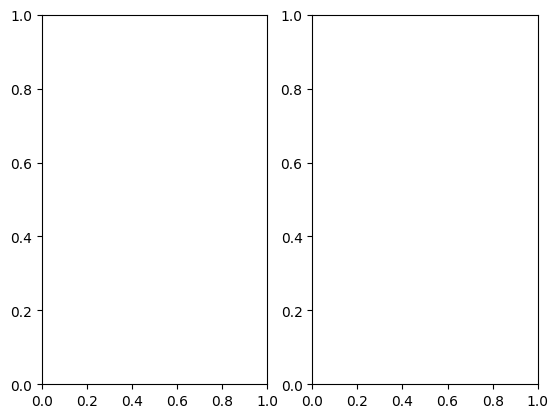

In [15]:
df_condtn=pd.read_csv('/content/condtn_merged.csv',index_col=[0])
df1 = pd.DataFrame(df_condtn['Avg_activity'])
fig, axs = plt.subplots(nrows=1, ncols=2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = sc.fit_transform(df1)
df1= sc.transform(df1 )
df_condtn['Avg_activity']=df1
# axs[0].hist(df1, edgecolor='black')

# df1=np.log(df1)
# df_condtn['Avg_activity']=df1
# df_condtn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<BarContainer object of 17016 artists>

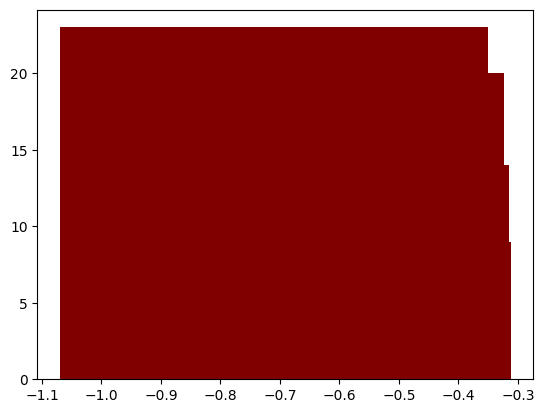

In [16]:
df_control=pd.read_csv('/content/control_merged.csv',index_col=[0])
df2 = pd.DataFrame(df_control['Avg_activity'])
from sklearn.preprocessing import StandardScaler
sc_h = StandardScaler()
df2 = sc_h.fit_transform(df2)
df2 = sc_h.transform(df2 )

df_control['Avg_activity']=df2
plt.bar(df_control['Avg_activity'],df_control['hour'], color ='maroon',
        width = 0.7)


In [17]:
df_control
f=pd.DataFrame(df_control['Avg_activity'])
# axs[1].hist(f,edgecolor='black')

In [18]:
condtn_avg=df_condtn.Avg_activity
condtn_avg=np.array(condtn_avg)
print(condtn_avg)

[-0.74436173 -0.74566942 -0.74578314 ... -0.75167343 -0.75167343
 -0.74804955]


In [19]:
control_avg=df_control.Avg_activity
control_avg=np.array(control_avg)
print(control_avg)

[-0.71762165 -0.71605492 -0.70386878 ... -0.71981886 -0.719868
 -0.71983988]


In [20]:
n1 = len(condtn_avg)
n2 = len(control_avg)

In [21]:
normalized_condtn=condtn_avg
normalized_control=control_avg


In [22]:
x1_bar = np.mean(normalized_condtn)
x2_bar = np.mean(normalized_control)

In [23]:
s1 = np.std(condtn_avg, ddof=1)
s2 = np.std(control_avg, ddof=1)

In [24]:
print("Basic Statistics from the data")
print("Number of condition sample:", n1, "Number of control sample:", n2)
print("condition mean:", x1_bar, "control mean:", x2_bar)
print("condtn_std:", s1, "control_std:", s2)

Basic Statistics from the data
Number of condition sample: 9214 Number of control sample: 17016
condition mean: -0.748236546171556 control mean: -0.7171595760785524
condtn_std: 0.004593563907773416 control_std: 0.0038076442651016206


In [25]:
def ztest_ind(X1, X2, mudiff, std_dev_1, std_dev_2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooled_SE = sqrt(std_dev_1**2/n1 + std_dev_2**2/n2)
    z = ((X1 - X2) - mudiff)/pooled_SE
    if (z<0):
        p=stats.norm.cdf(z)
    else:
        p=1-stats.norm.cdf(z)

    pval = 2*p
    return round(z, 3), round(pval, 20)


In [26]:
z_statistics, p_value = ztest_ind(x1_bar,x2_bar, 0, s1, s2, n1, n2)
print("Z-statistics: ", z_statistics)
print("P-value: ", p_value)


Z-statistics:  -554.406
P-value:  0.0
